# TWITTER SENTIMENT ANALYSIS

In [111]:
#importing libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

#template from https://github.com/pjwebdev/Basic-Data-Science-Projects/blob/master/8-Twitter-Sentiment-Analysis/Tweeter%20Sentiment%20Analysis.ipynb


In [112]:
#authentication keys for the twitter API 
API_key='AuWVCAr7sq0YezmRqyExQE6oR'
API_secret='mfcftTiioY0YKQHqgFZMHnyq3nwuR4SJ0pxOGGkoDQ1sdM5GVW'

access_token='294376789-mejpcjGPptNX1nbooc6dx8mdeiCMhroRB8bu9HnL'
access_token_secret='aJv5Rg1llLox5s19UL2NLbkeSwN4uGJvb9WiTwrugxMQg'


In [113]:
#calling the API

auth = tweepy.OAuthHandler(API_key, API_secret)
auth.set_access_token(access_token, access_token_secret)
tw_API = tweepy.API(auth, wait_on_rate_limit = True)

## ANALYZING USER

In [167]:
#defining user and number of tweets
tw_user='RealDonaldTrump'
tw_number=50

In [168]:
#calling the tweets from the API
tweets = tweepy.Cursor(tw_API.user_timeline, screen_name=tw_user, count=None, since_id=None, max_id=None,
                        trim_user=True, exclude_replies=True, contributor_details=False, include_entities=False).items(tw_number);



In [169]:
#organizing the data into a dataframe
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweet'])
df.head()

,tweet
0,Franklin Graham: ‘I Am Grateful to God’ for ‘t...
1,RT @wesrap: All of the 38 electoral college vo...
2,Because of corruption or because I won despite...
3,Mo Brooks: ‘Trump Won the Electoral College‘ -...
4,Tremendous evidence pouring in on voter fraud....


In [170]:
#cleaning the tweets, they are always dirty!. Removing mentions, hashtags, RT, and urls
def cleanTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+','', txt)
    txt = re.sub(r'#','', txt)
    txt = re.sub(r'RT : ','', txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+','', txt)
    txt = re.sub(r'\n','', txt)
    txt = re.sub(r'-','', txt)
    return txt

In [171]:
#apply to the df
df['tweet']=df['tweet'].apply(cleanTweet)

In [172]:
df.head(15)

,tweet
0,Franklin Graham: ‘I Am Grateful to God’ for ‘t...
1,All of the 38 electoral college votes for Texa...
2,Because of corruption or because I won despite...
3,Mo Brooks: ‘Trump Won the Electoral College‘ ...
4,Tremendous evidence pouring in on voter fraud....
5,President Trump is a genuinely good man. He d...
6,The President needs to hold a press conference...
7,REPORT: Dominion Server Crash Delays Recount i...
8,EXCLUSIVE: Whistleblower Reveals FRAUD in Detr...
9,68% error rate in Michigan Voting Machines. Sh...


In [173]:
#now we want to apply polarity and subjectivity to the tweets

def getSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getPolarity(txt):
    return TextBlob(txt).sentiment.polarity

df['Subjectivity'] = df['tweet'].apply(getSubjectivity)
df['Polarity'] = df['tweet'].apply(getPolarity)


In [174]:
df.head(15)

,tweet,Subjectivity,Polarity
0,Franklin Graham: ‘I Am Grateful to God’ for ‘t...,0.066667,0.000000
1,All of the 38 electoral college votes for Texa...,0.000000,0.000000
2,Because of corruption or because I won despite...,0.000000,0.000000
3,Mo Brooks: ‘Trump Won the Electoral College‘ ...,0.000000,0.000000
4,Tremendous evidence pouring in on voter fraud....,1.000000,0.416667
5,President Trump is a genuinely good man. He d...,0.400000,0.300000
6,The President needs to hold a press conference...,0.375000,0.107143
7,REPORT: Dominion Server Crash Delays Recount i...,0.000000,0.000000
8,EXCLUSIVE: Whistleblower Reveals FRAUD in Detr...,0.000000,0.000000
9,68% error rate in Michigan Voting Machines. Sh...,0.500000,0.000000


In [175]:
#clasifying polarity
def getScore(x):
    if x>0:
        return 'Positive'
    elif x<0:
        return 'Negative'
    else:
        return 'Neutral'
    
df['Score']=df['Polarity'].apply(getScore)

In [176]:
df.head(15)

,tweet,Subjectivity,Polarity,Score
0,Franklin Graham: ‘I Am Grateful to God’ for ‘t...,0.066667,0.000000,Neutral
1,All of the 38 electoral college votes for Texa...,0.000000,0.000000,Neutral
2,Because of corruption or because I won despite...,0.000000,0.000000,Neutral
3,Mo Brooks: ‘Trump Won the Electoral College‘ ...,0.000000,0.000000,Neutral
4,Tremendous evidence pouring in on voter fraud....,1.000000,0.416667,Positive
5,President Trump is a genuinely good man. He d...,0.400000,0.300000,Positive
6,The President needs to hold a press conference...,0.375000,0.107143,Positive
7,REPORT: Dominion Server Crash Delays Recount i...,0.000000,0.000000,Neutral
8,EXCLUSIVE: Whistleblower Reveals FRAUD in Detr...,0.000000,0.000000,Neutral
9,68% error rate in Michigan Voting Machines. Sh...,0.500000,0.000000,Neutral


### Results

This pie chart shows the level of Polarity in the user´s tweets

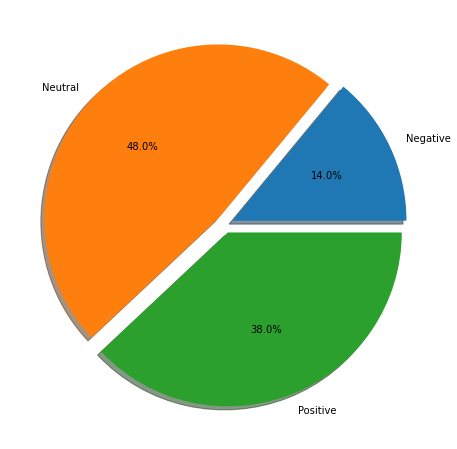

In [180]:
labels = df.groupby('Score').count().index.values
values = df.groupby('Score').size().values
explode = (0.05, 0.05, 0.05) 

plt.pie(values,labels=labels,explode=explode,autopct='%1.1f%%',shadow=True)
plt.show()

The following graph shows the relation between the Subjectivity and the Polarity of the tweets

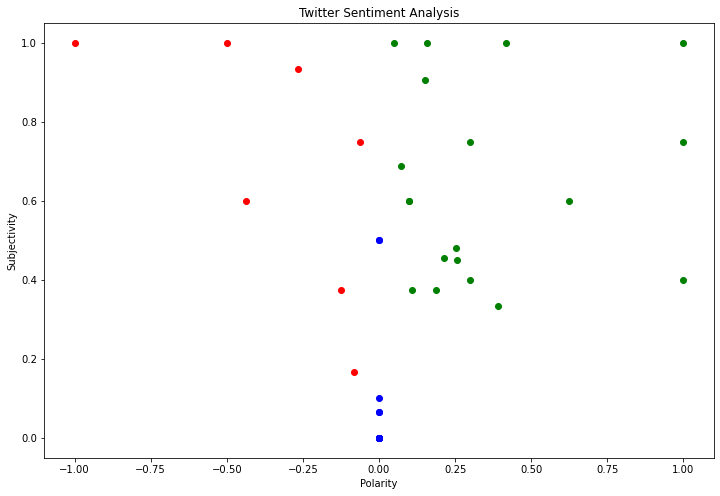

In [181]:
for index, row in df.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.show()


Word Cloud shows us the favorite user´s words

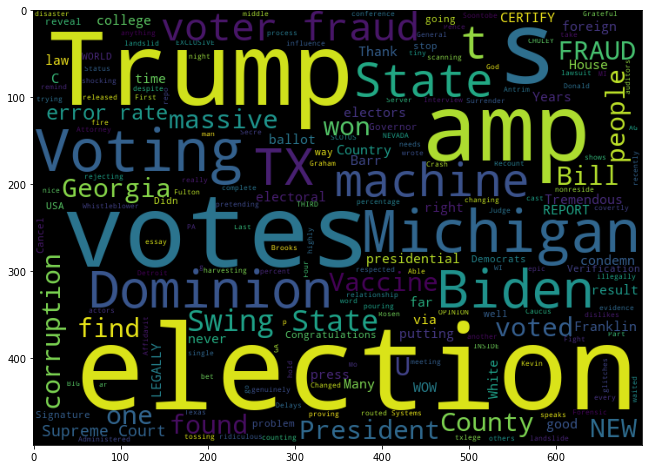

In [182]:
words = ' '.join([tweet for tweet in df['tweet']])
wordCloud = WordCloud(width=700, height=500).generate(words)

plt.imshow(wordCloud)
plt.show()

## ANALYZING WORD

In [194]:
random_tweets=tw_API.search('Biden',count=100)

In [195]:
df_n = pd.DataFrame(data=[tweet.text for tweet in random_tweets], columns=['tweet'])
df_n.head()

,tweet
0,RT @shOoObz: Biden has won the election everyd...
1,RT @eyesonthestorm: Citizens whose political e...
2,RT @Public_Citizen: Trump’s lame duck period h...
3,RT @KelemenCari: Election Status: Trump is in ...
4,@ChrisFlores8 @CBSNews You know Hillary actual...


In [198]:
df_n['tweet']=df_n['tweet'].apply(cleanTweet)
df_n.head()

,tweet
0,Biden has won the election everyday for a mont...
1,Citizens whose political engagement peaked in ...
2,Trump’s lame duck period has been a crime agai...
3,Election Status: Trump is in the process of pr...
4,"You know Hillary actually did that, rightAnd..."


In [201]:
df_n['Subjectivity'] = df_n['tweet'].apply(getSubjectivity)
df_n['Polarity'] = df_n['tweet'].apply(getPolarity)
df_n['Score']=df_n['Polarity'].apply(getScore)

In [202]:
df_n.head()

,tweet,Subjectivity,Polarity,Score
0,Biden has won the election everyday for a mont...,0.550000,-0.100000,Negative
1,Citizens whose political engagement peaked in ...,0.100000,0.000000,Neutral
2,Trump’s lame duck period has been a crime agai...,0.750000,-0.500000,Negative
3,Election Status: Trump is in the process of pr...,0.000000,0.000000,Neutral
4,"You know Hillary actually did that, rightAnd...",0.344444,0.111111,Positive


### Results

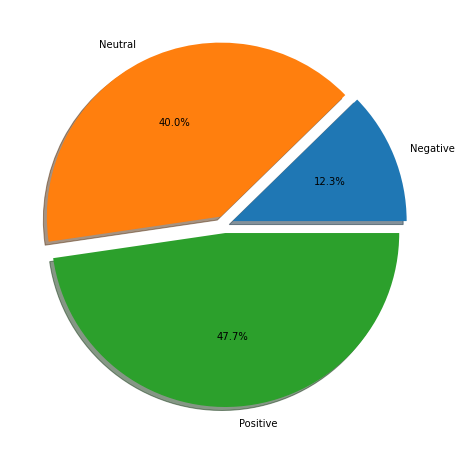

In [203]:
labels = df_n.groupby('Score').count().index.values
values = df_n.groupby('Score').size().values
explode = (0.05, 0.05, 0.05) 

plt.pie(values,labels=labels,explode=explode,autopct='%1.1f%%',shadow=True)
plt.show()

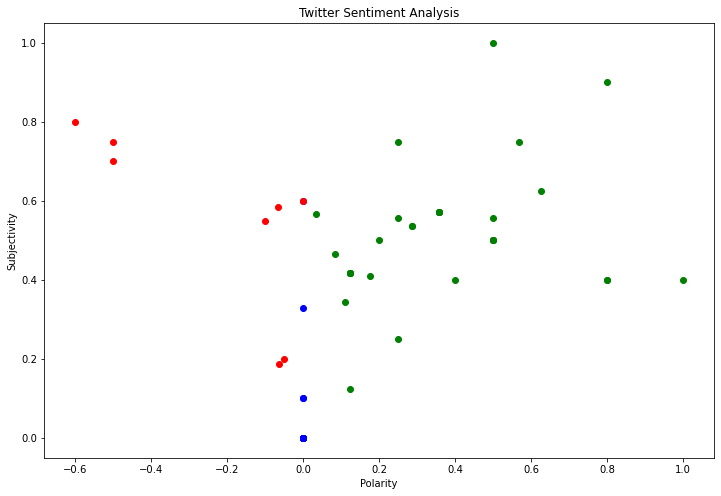

In [204]:
for index, row in df_n.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.show()

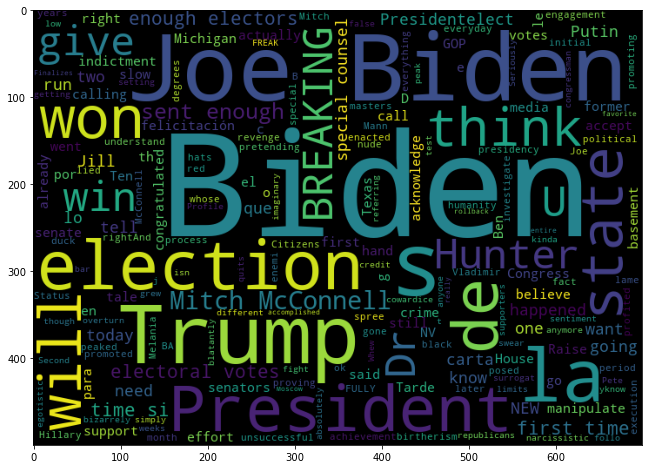

In [205]:
words = ' '.join([tweet for tweet in df_n['tweet']])
wordCloud = WordCloud(width=700, height=500).generate(words)

plt.imshow(wordCloud)
plt.show()